In [163]:
from IPython.display import Image
from IPython.core.display import HTML
import scipy.stats as st
import statsmodels.stats.api as sms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Test a perceptual phenomenon: the Stroop effect
https://faculty.washington.edu/chudler/words.html#seffect

In [240]:
Image(url='https://faculty.washington.edu/chudler/colors2.gif')

## Load the dataset with test result

In [31]:
df=pd.read_csv('stroopdata.csv')
df.shape

(24, 2)

Dataset is made of 24 rows and 2 columns: <br>
    - 24 people performed the stroop effect test
    - results of the test (time to read the list of word) are given for the congruent and incongruent conditions

## Descriptive statistics
    - histogram plot of both tests
    - min, max, mean, median, std result of the tests

In [110]:
congruent_sample_size=df.Congruent.count()
congruent_min=df.Congruent.min()
congruent_max=df.Congruent.max()
congruent_mean=df.Congruent.mean()
congruent_median=df.Congruent.median()
congruent_std=df.Congruent.std()

incongruent_sample_size=df.Incongruent.count()
incongruent_min=df.Incongruent.min()
incongruent_max=df.Incongruent.max()
incongruent_mean=df.Incongruent.mean()
incongruent_median=df.Incongruent.median()
incongruent_std=df.Incongruent.std()

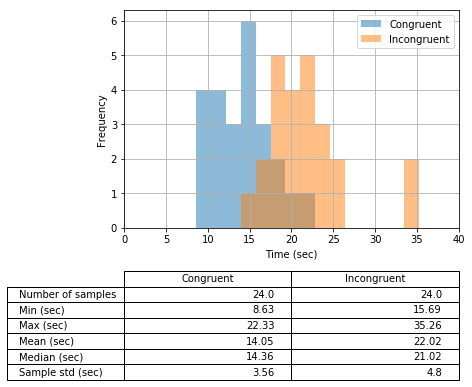

In [236]:
ax=df.plot(kind='hist',y=['Congruent', 'Incongruent'],alpha=0.5,xlim=(0,40),bins=15,grid=True)
ax.set_xlabel('Time (sec)')
colLabels=['Congruent','Incongruent']
rowLabels=['Number of samples','Min (sec)','Max (sec)','Mean (sec)','Median (sec)','Sample std (sec)']
cellText =np.array([[round(congruent_sample_size,0),round(incongruent_sample_size,0)],
                    [round(congruent_min,2),round(incongruent_min,2)],
                    [round(congruent_max,2),round(incongruent_max,2)],
                    [round(congruent_mean,2),round(incongruent_mean,2)],
                    [round(congruent_median,2),round(incongruent_median,2)],
                    [round(congruent_std,2),round(incongruent_std,2)],
                   ])
plt.table(cellText=cellText,rowLabels=rowLabels,colLabels=colLabels,
         bbox=[0, -0.7, 1, 0.5])

The descriptive statistics analysis shows that <br>
    - in average it takes 8 more secondes to carry out the incongruent test compared to the congruent test
    - sample standard deviation for both tests is around 4 secondes
An inferential statistical analysis is required to conclude whether results of both tests are significantly different.

## Statistical test
A two independent sample t-test will be performed to figure out whether test condition has a significant impact on the time to carry out the test. It is choosen to perform a two tailed t-test.<br>
The null hypothesis is that test condition (congruent or incongruent) has no impact on the test results (time to complete the test) <br>
$$H_{0} : \mu_{congruent}- \mu_{incongruent} = 0$$
<br>
The alternative hypothesis is that the test condition has an impact on the test results <br>
$$H_{A} : \mu_{congruent}- \mu_{incongruent} \neq 0$$
The significance level is set to 5% <br>
$$\alpha=.05$$

In [239]:
alpha=0.05
df['Congruent_demeaned_squared']=(df['Congruent']-congruent_mean)**2
SS_congruent=df['Congruent_demeaned_squared'].sum()
df['Incongruent_demeaned_squared']=(df['Incongruent']-incongruent_mean)**2
SS_incongruent=df['Incongruent_demeaned_squared'].sum()
pooled_variance=(SS_congruent+SS_incongruent)/(congruent_sample_size+incongruent_sample_size-2)
SE=(pooled_variance*(1./congruent_sample_size+1./incongruent_sample_size))**0.5
t_statistic=(congruent_mean-incongruent_mean)/SE
t_critical=(st.t.ppf(alpha/2 ,congruent_sample_size+incongruent_sample_size-2))
r2=t_statistic**2/(t_statistic**2+congruent_sample_size+incongruent_sample_size-2)
margin_of_error=abs(st.t.ppf(alpha/2 ,congruent_sample_size+incongruent_sample_size-2)*SE)

if abs(t_statistic)<abs(t_critical):
    test_result='fail to reject H0'
else:
    test_result='reject H0'

print '''
alpha: {:.2f}
degree of freedom: {:d}
t_statistic: {:.3f}
t_critical: {:.3f}
hypothesis testing result: {}
r2: {:.0%}
margin of error: {:.2f}
congruent mean: {:.2f}
incongruent mean: {:.2f}
confidence interval for congruent mean: ({:.2f},{:.2f})
'''.format(alpha,
    congruent_sample_size+incongruent_sample_size-2,
           t_statistic,
           t_critical,
           test_result,
           r2,
           margin_of_error,
           congruent_mean,
           incongruent_mean,
           congruent_mean-margin_of_error,
           congruent_mean+margin_of_error,)


alpha: 0.05
degree of freedom: 46
t_statistic: -6.532
t_critical: -2.013
hypothesis testing result: reject H0
r2: 48%
margin of error: 2.45
congruent mean: 14.05
incongruent mean: 22.02
confidence interval for congruent mean: (11.60,16.51)



### Same statistical test with scipy built in function
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [215]:
t_statistic,p_value=st.ttest_ind(df['Congruent'],df['Incongruent'], axis=0, equal_var=False, nan_policy='raise')

if p_value>alpha:
    test_result='fail to reject H0'
else:
    test_result='reject H0'

print '''
t_statistic: {:.3f}
alpha: {:.3f}
p_value: {:.3f}
hypothesis testing result: {}
'''.format(t_statistic,
           alpha,
           p_value,
           test_result)


t_statistic: -6.532
alpha: 0.050
p_value: 0.000
hypothesis testing result: reject H0



### Same statistical test with statsmodel built in function
https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ttest_ind.html

In [217]:
t_critical, p_value, dof=sm_weightstats.ttest_ind(df['Congruent'], df['Incongruent'],
                                                  alternative='two-sided', usevar='unequal', value=0)

cm = sms.CompareMeans(sms.DescrStatsW(df['Congruent']), sms.DescrStatsW(df['Incongruent']))
t_critical, p_value, dof = cm.ttest_ind(alternative='two-sided',usevar='unequal', value=0)
tconfint_diff = cm.tconfint_diff(alpha=0.05,alternative='two-sided',usevar='unequal')

if p_value>alpha:
    test_result='fail to reject H0'
else:
    test_result='reject H0'

print '''
t_statistic: {:.3f}
alpha: {:.3f}
p_value: {:.3f}
hypothesis testing result: {}
confidence interval for the difference in means: ({:.2f},{:.2f})
'''.format(t_statistic,
           alpha,
           p_value,
           test_result,
           tconfint_diff[0],
           tconfint_diff[1])


t_statistic: -6.532
alpha: 0.050
p_value: 0.000
hypothesis testing result: reject H0
confidence interval for the difference in means: (-10.42,-5.50)



In [223]:
cm.summary(use_t=True, alpha=0.05, usevar='unequal', value=0)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-7.9648,1.219,-6.532,0.000,-10.425,-5.505


Result of the two independent sample t-test is <br>
$$t(46)=6.532, \text{ } p<.05, \text{ two tailed}$$
We reject the null hypothesis and conclude there is a significant difference between the two sample results.<br>
The confidence interval at 95% for the congruent test is (11.60 sec to 16.51 sec) and the incongruent test takes a longer time (22.02 sec in average).<br>
48% of the difference between the two test results can be explained by the test conditions.